# Multivariate Analysis
VAR

In [75]:
#Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.base import  datetools

In [62]:
#Here I am considering three variable real gdp real cons and realinv for further modeling processing. And also need to make a datetime value using the year and quarter columns before going for further processes.
mdata = sm.datasets.macrodata.load_pandas().data
mdata.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [63]:
#Here I am considering three variable real gdp real cons and realinv for further modeling processing. And also need to make a datetime value using the year and quarter columns before going for further processes.
mdata1 = mdata[['year','quarter']].astype(int)
mdata2 = mdata1[['year','quarter']].astype(str)
quarterly = mdata2["year"] + "Q" + mdata2["quarter"]
quarterly = datetools.dates_from_str(quarterly)
quarterly

[datetime.datetime(1959, 3, 31, 0, 0),
 datetime.datetime(1959, 6, 30, 0, 0),
 datetime.datetime(1959, 9, 30, 0, 0),
 datetime.datetime(1959, 12, 31, 0, 0),
 datetime.datetime(1960, 3, 31, 0, 0),
 datetime.datetime(1960, 6, 30, 0, 0),
 datetime.datetime(1960, 9, 30, 0, 0),
 datetime.datetime(1960, 12, 31, 0, 0),
 datetime.datetime(1961, 3, 31, 0, 0),
 datetime.datetime(1961, 6, 30, 0, 0),
 datetime.datetime(1961, 9, 30, 0, 0),
 datetime.datetime(1961, 12, 31, 0, 0),
 datetime.datetime(1962, 3, 31, 0, 0),
 datetime.datetime(1962, 6, 30, 0, 0),
 datetime.datetime(1962, 9, 30, 0, 0),
 datetime.datetime(1962, 12, 31, 0, 0),
 datetime.datetime(1963, 3, 31, 0, 0),
 datetime.datetime(1963, 6, 30, 0, 0),
 datetime.datetime(1963, 9, 30, 0, 0),
 datetime.datetime(1963, 12, 31, 0, 0),
 datetime.datetime(1964, 3, 31, 0, 0),
 datetime.datetime(1964, 6, 30, 0, 0),
 datetime.datetime(1964, 9, 30, 0, 0),
 datetime.datetime(1964, 12, 31, 0, 0),
 datetime.datetime(1965, 3, 31, 0, 0),
 datetime.datetime(

In [64]:
#Now we can use the datetime values as the index of our data. 
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
mdata.head()

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722


<AxesSubplot:>

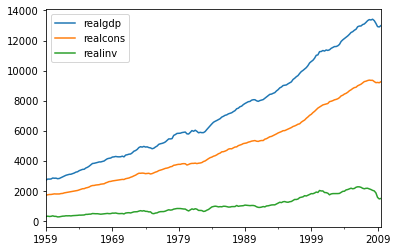

In [65]:
#Visualizing the data.
mdata.plot()

<AxesSubplot:>

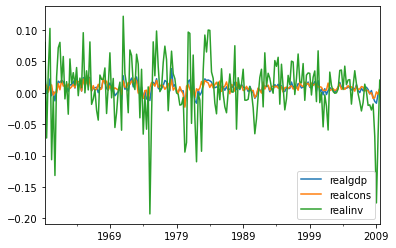

In [66]:
#So we can check the pattern of time series in their log values.
data = np.log(mdata).diff().dropna()
data.plot()

In [67]:
#Granger’s causality test
#By using granger’s causality test, we can find the relationship between the variables before building the model because it is known that if there is no relationship between the variables, we can drop the variables and separately do the modeling. If there is a relationship between them, we need to consider the variable in the modeling part.
data = mdata[["realgdp", "realcons"]].pct_change().dropna()
#Performing test on for realgdp and realcons.
gc_res = grangercausalitytests(data, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=38.9498 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5873 , p=0.0000  , df=2
parameter F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=41.9812 , p=0.0000  , df=3
likelihood ratio test: chi2=38.0914 , p=0.0000  , df=3
parameter F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.9646 , p=0.0000  

In [68]:
# Here we can see that p-values for every lag are zero. So now, let’s move forward for the causality test between realgdp and real inv.
data = mdata[["realgdp", "realinv"]].pct_change().dropna()

In [69]:
#Here we can see p values for every lag is higher than 0.05, which means we need to accept the null hypothesis. And also, we can say that a similar thing will happen if we perform the test between realcons and realinv.
data = mdata[["realcons", "realinv"]].pct_change().dropna()

In [70]:
#Cointegration test
#Cointegration helps to find out the statistical connection between two or more time series. When two or more time series are cointegrated, they have a long run, statistically significant relationship.
data = mdata[["realgdp","realcons", "realinv"]].pct_change().dropna()
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(data, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(data,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
        # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(data.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
        cointegration_test(data)

# Modeling

In [71]:
#We can directly put the preprocessed data in the VAR module for modeling purposes.
var = VAR(data)
var

In [77]:
#Statsmodel provides the select_order module to analyze these values.
x= var.select_order()
x.summary()

,AIC,BIC,FPE,HQIC
0,-27.69,-27.64,9.439e-13,-27.67
1,-28.00,-27.79*,6.905e-13,-27.92*
2,-28.00,-27.64,6.884e-13,-27.86
3,-28.02*,-27.50,6.787e-13*,-27.81
4,-28.01,-27.34,6.863e-13,-27.74
5,-28.00,-27.18,6.901e-13,-27.67
6,-27.95,-26.97,7.283e-13,-27.55
7,-27.91,-26.77,7.598e-13,-27.45
8,-27.91,-26.62,7.578e-13,-27.39
9,-27.94,-26.49,7.392e-13,-27.35


In [72]:
#Here we can see the minimum values in combination with the AIC, BIC, FPE and HQIC are given with the * sign. Here we can see we have that sign in the third row and the first row. Here I am choosing the third row, which means that the value of lag valueVAR(p) is three because it is suggested to go with the combinations where AIC with other parameters are generating minimums.
results = var.fit(3)
#We can check the summary of the model by.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 29, Mar, 2022
Time:                     12:22:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4082
Nobs:                     199.000    HQIC:                  -27.7037
Log likelihood:           1959.41    FPE:                7.60784e-13
AIC:                     -27.9047    Det(Omega_mle):     6.56722e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001353         0.001274            1.062           0.288
L1.realgdp         -0.294279         0.172029           -1.711           0.087
L1.realcons         0.673839         0.132132            5.100    

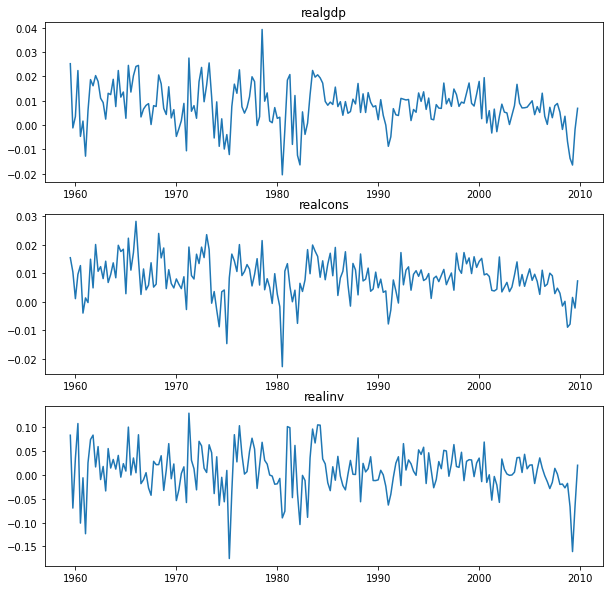

In [73]:
#Visualizing the input:
results.plot();

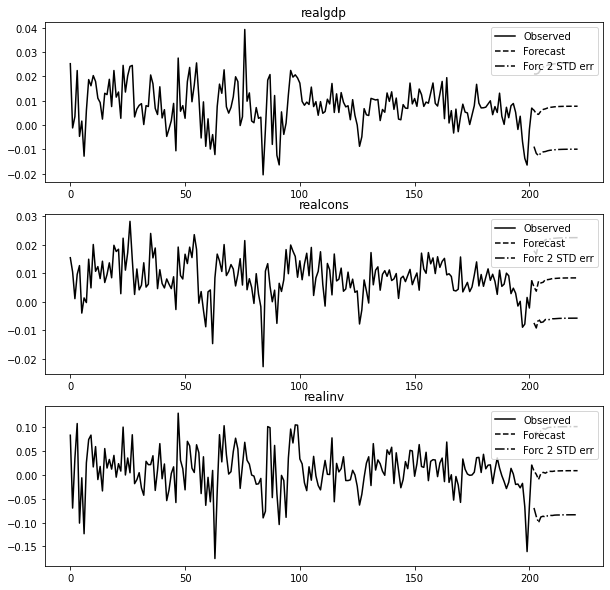

In [60]:
#We can also plot our forecasted values by the model.
results.plot_forecast(20);